<a href="https://colab.research.google.com/github/yretrut/IIS/blob/main/5lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа 5**

**Построение нейросети. Часть 2**


Допустим, у нас есть машина с четырьмя кнопками, которая выдает еду при нажатии правильной кнопки (ну, или энергию, если вы робот). Задача — узнать, какая кнопка выдает вознаграждение:
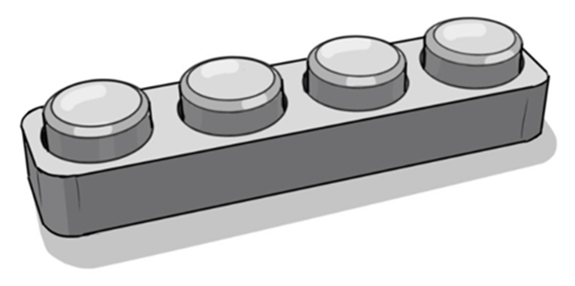



Мы можем изобразить (схематично), что делает кнопка при нажатии следующим образом:

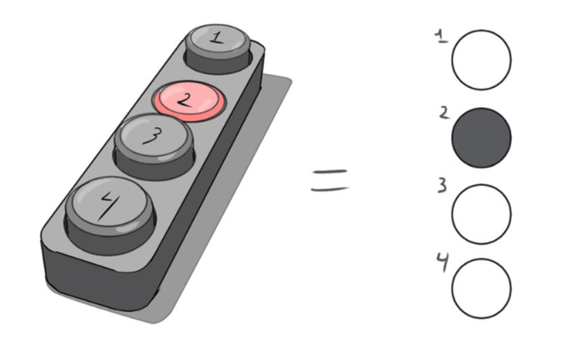

Такую задачу лучше решать целиком, поэтому давайте посмотрим на все возможные результаты, включая правильный:

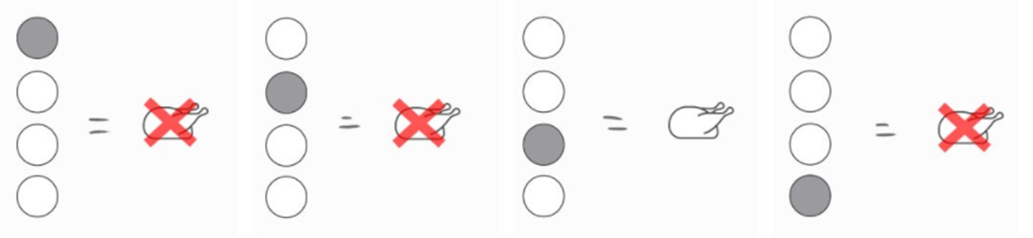

Нажмите на 3-ю кнопку, чтобы получить свой ужин.
Чтобы воспроизвести нейронную сеть в коде, нам для начала нужно сделать модель или график, с которым можно сопоставить сеть. Вот один подходящий под задачу график, к тому же он хорошо отображает свой биологический аналог:

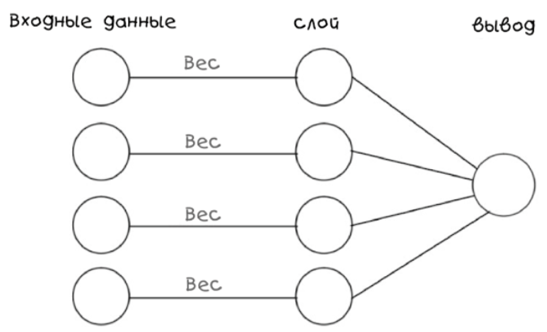

Эта нейронная сеть просто получает входящую информацию — в данном случае это будет восприятие того, какую кнопку нажали. Далее сеть заменяет входящую информацию на веса и делает вывод на основе добавления слоя. Звучит немного запутанно, но давайте посмотрим, как в нашей модели представлена кнопка:

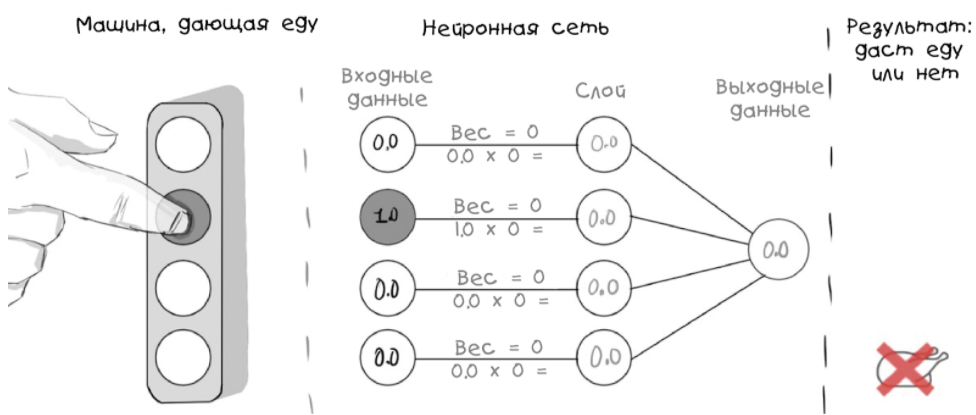

Обратите внимание, что все веса равны 0, поэтому нейронная сеть совершенно пуста, но полностью взаимосвязана.

Таким образом мы сопоставляем внешнее событие с входным слоем нейронной сети и вычисляем значение на ее выходе. Оно может совпадать или не совпадать с реальностью, но это мы пока проигнорируем и начнем описывать задачу понятным компьютеру способом. Начнем с ввода весов:


In [ ]:
inputs = [0, 0, 1, 0]
weights = [0, 0, 0, 0]

Следующий шаг — создание функции, которая собирает входные значения и веса и рассчитывает значение на выходе:

In [1]:
def evaluate_neural_network(input_array, weight_array):
    result = 0
    for i in range(len(input_array)):
        layer_value = input_array[i] * weight_array[i]
        result += layer_value
    print("эволюция НС: " + str(result))
    print("веса: " + str(weights))
    return result

Следующим шагом в усовершенствовании нашей нейросети будет способ проверки её собственных выходных или результирующих значений сопоставимо реальной ситуации, давайте сначала закодируем эту конкретную реальность в переменную:

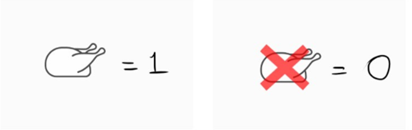

In [ ]:
Error = Reality - Neural Net Output

С ней мы можем оценивать работу нашей нейронной сети:

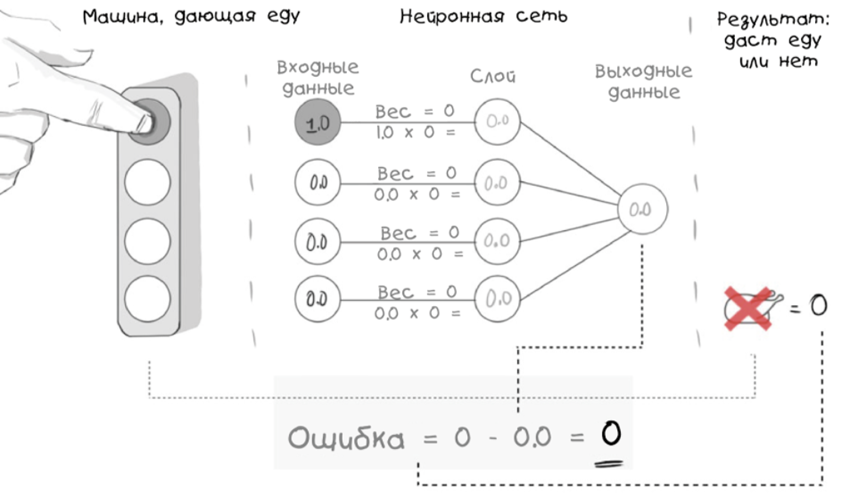


Но что более важно — как насчет ситуаций, когда реальность дает положительный результат?

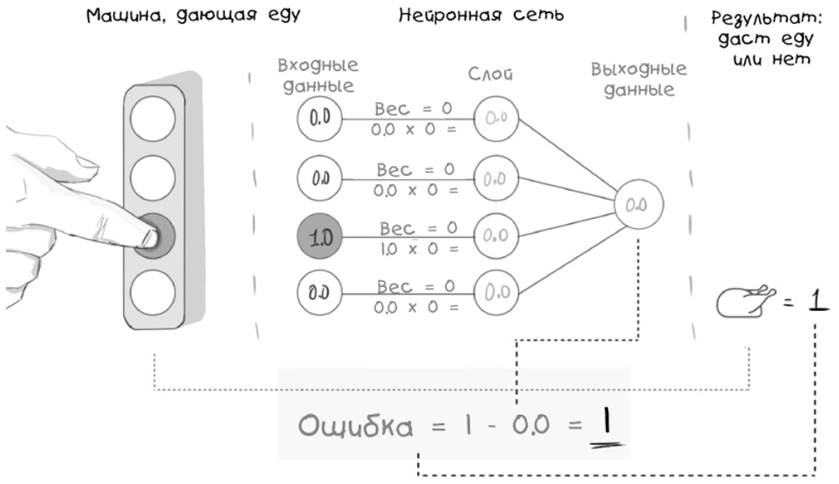

Теперь мы знаем, что наша модель нейронной сети не работает (и знаем, насколько), здорово! А здорово это потому, что теперь мы можем использовать функцию ошибки для управления нашим обучением. Но всё это обретет смысл в том случае, если мы переопределим функцию ошибок следующим образом:

In [ ]:
error = desired - actual

Неуловимое, но такое важное расхождение, молчаливо показывающее, что мы будем использовать ранее полученные результаты для сопоставления с будущими действиями (и для обучения, как мы потом увидим). Это существует и в реальной жизни, полной повторяющихся паттернов, поэтому оно может стать эволюционной стратегией (ну, в большинстве случаев).
Далее в наш пример кода мы добавим новую переменную desired_result :



In [ ]:
desired_result = 1

И новую функцию:

In [ ]:
def evaluate_error(desired, actual):
    error = desired - actual
    print("evaluate_error: " + str(error))
    return error


Подведем промежуточный итог. Мы начали с задачи, сделали её простую модель в виде биологической нейронной сети и получили способ измерения её производительности по сравнению с реальностью или желаемым результатом. Теперь нам нужно найти способ исправления несоответствия — процесс, который как и для компьютеров, так и для людей можно рассматривать как обучение.

**Как обучать нейронную сеть?**

Основа обучения как биологической, так и искусственной нейронной сети — это повторение и алгоритмы обучения, поэтому мы будем работать с ними по отдельности. Начнем с обучающих алгоритмов.

В природе под алгоритмами обучения понимаются изменения физических или химических характеристик нейронов после проведения экспериментов:

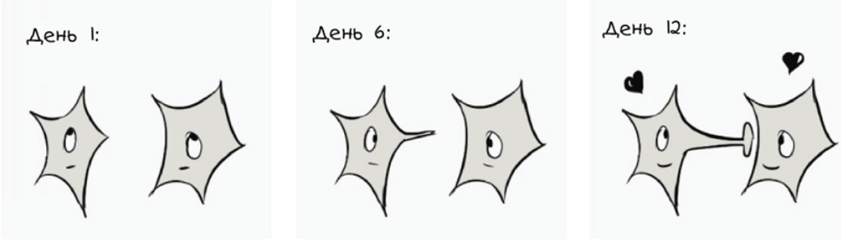

В коде и нашей модели «алгоритм обучения» означает, что мы просто будем что-то менять в течение какого-то времени, чтобы облегчить свою жизнь. Поэтому давайте добавим новую переменную:

In [ ]:
learning_rate = 0.2

Это изменит веса, особенно вес вывода, который мы хотим получить:

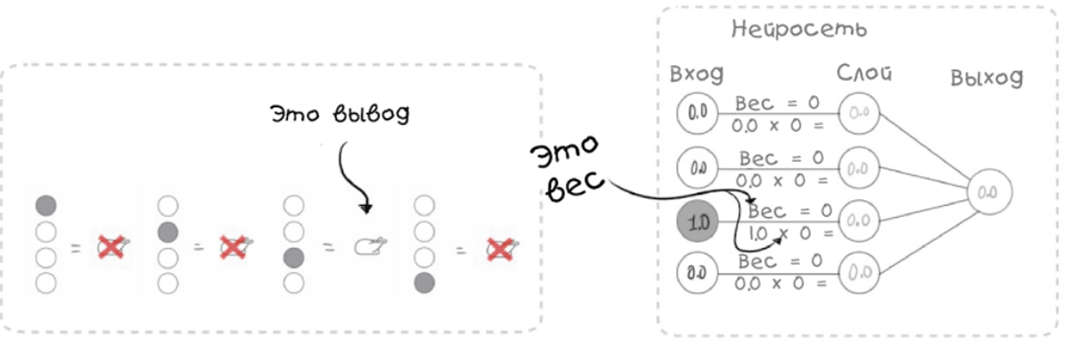

Как кодировать такой алгоритм — ваш выбор, один из вариантов — добавить коэффициент обучения к весу, вот он в виде функции:

In [ ]:
def learn(input_array, weight_array):
    print("обучение...")
    for i in range(len(input_array)):
        if input_array[i] > 0:
            weight_array[i] += learning_rate

При использовании эта обучающая функция просто добавит наш коэффициент обучения к вектору веса активного нейрона.
Теперь, когда мы движемся в верном направлении, последней деталью этой головоломки будет внедрение повторов. Это не так уж и сложно, в природе мы просто делаем одно и то же снова и снова, а в коде мы просто указываем количество повторов:


In [ ]:
trials = 6

И внедрение в нашу обучающую нейросеть функции количества повторов будет выглядеть так:

In [ ]:
def train(trials):
    for i in range(trials):
        neural_net_result = evaluate_neural_network(inputs, weights)
        learn(inputs, weights)


Итак, собираем наш код:

In [3]:
inputs = [0, 0, 1, 0]
weights = [0, 0, 0, 0]

desired_result = 1
learning_rate = 0.2
trials = 6

def evaluate_neural_network(input_array, weight_array):
    result = 0
    for i in range(len(input_array)):
        layer_value = input_array[i] * weight_array[i]
        result += layer_value
    print("эволюция НС: " + str(result))
    print("веса: " + str(weights))
    return result
    
def evaluate_error(desired, actual):
    error = desired - actual
    print("evaluate_error: " + str(error))
    return error
    
def learn(input_array, weight_array):
    print("обучение...")
    for i in range(len(input_array)):
        if input_array[i] > 0:
            weight_array[i] += learning_rate
            
def train(trials):
    for i in range(trials):
        neural_net_result = evaluate_neural_network(inputs, weights)
        learn(inputs, weights)
        
train(trials)

эволюция НС: 0
веса: [0, 0, 0, 0]
обучение...
эволюция НС: 0.2
веса: [0, 0, 0.2, 0]
обучение...
эволюция НС: 0.4
веса: [0, 0, 0.4, 0]
обучение...
эволюция НС: 0.6000000000000001
веса: [0, 0, 0.6000000000000001, 0]
обучение...
эволюция НС: 0.8
веса: [0, 0, 0.8, 0]
обучение...
эволюция НС: 1.0
веса: [0, 0, 1.0, 0]
обучение...


Попробуем изменить значение переменной trials:

In [4]:
inputs = [0, 0, 1, 0]
weights = [0, 0, 0, 0]

desired_result = 1
learning_rate = 0.2
trials = 10

def evaluate_neural_network(input_array, weight_array):
    result = 0
    for i in range(len(input_array)):
        layer_value = input_array[i] * weight_array[i]
        result += layer_value
    print("эволюция НС: " + str(result))
    print("веса: " + str(weights))
    return result
    
def evaluate_error(desired, actual):
    error = desired - actual
    print("evaluate_error: " + str(error))
    return error
    
def learn(input_array, weight_array):
    print("обучение...")
    for i in range(len(input_array)):
        if input_array[i] > 0:
            weight_array[i] += learning_rate
            
def train(trials):
    for i in range(trials):
        neural_net_result = evaluate_neural_network(inputs, weights)
        learn(inputs, weights)
        
train(trials)

эволюция НС: 0
веса: [0, 0, 0, 0]
обучение...
эволюция НС: 0.2
веса: [0, 0, 0.2, 0]
обучение...
эволюция НС: 0.4
веса: [0, 0, 0.4, 0]
обучение...
эволюция НС: 0.6000000000000001
веса: [0, 0, 0.6000000000000001, 0]
обучение...
эволюция НС: 0.8
веса: [0, 0, 0.8, 0]
обучение...
эволюция НС: 1.0
веса: [0, 0, 1.0, 0]
обучение...
эволюция НС: 1.2
веса: [0, 0, 1.2, 0]
обучение...
эволюция НС: 1.4
веса: [0, 0, 1.4, 0]
обучение...
эволюция НС: 1.5999999999999999
веса: [0, 0, 1.5999999999999999, 0]
обучение...
эволюция НС: 1.7999999999999998
веса: [0, 0, 1.7999999999999998, 0]
обучение...


Попробуем изменить значение переменной learning_rate:

In [5]:
inputs = [0, 0, 1, 0]
weights = [0, 0, 0, 0]

desired_result = 1
learning_rate = 1
trials = 6

def evaluate_neural_network(input_array, weight_array):
    result = 0
    for i in range(len(input_array)):
        layer_value = input_array[i] * weight_array[i]
        result += layer_value
    print("эволюция НС: " + str(result))
    print("веса: " + str(weights))
    return result
    
def evaluate_error(desired, actual):
    error = desired - actual
    print("evaluate_error: " + str(error))
    return error
    
def learn(input_array, weight_array):
    print("обучение...")
    for i in range(len(input_array)):
        if input_array[i] > 0:
            weight_array[i] += learning_rate
            
def train(trials):
    for i in range(trials):
        neural_net_result = evaluate_neural_network(inputs, weights)
        learn(inputs, weights)
        
train(trials)

эволюция НС: 0
веса: [0, 0, 0, 0]
обучение...
эволюция НС: 1
веса: [0, 0, 1, 0]
обучение...
эволюция НС: 2
веса: [0, 0, 2, 0]
обучение...
эволюция НС: 3
веса: [0, 0, 3, 0]
обучение...
эволюция НС: 4
веса: [0, 0, 4, 0]
обучение...
эволюция НС: 5
веса: [0, 0, 5, 0]
обучение...
